<a href="https://colab.research.google.com/github/abhi-11nav/NeuralStyle_transfer/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset credits:

https://www.kaggle.com/datasets/soumikrakshit/images-for-style-transfer

In [20]:
# Cloning the git repository for data access'

!git clone https://github.com/abhi-11nav/NeuralStyle_transfer.git

fatal: destination path 'NeuralStyle_transfer' already exists and is not an empty directory.


In [21]:
# Importing the necessary libraries

import tensorflow 

from tensorflow import keras 
from keras.applications import vgg19

In [22]:
# Let us first implement the style tranfer two random images

style_path = "/content/NeuralStyle_transfer/Data/Artworks/108700.jpg"

image_path = "/content/NeuralStyle_transfer/Data/TestCases/22714.jpg"

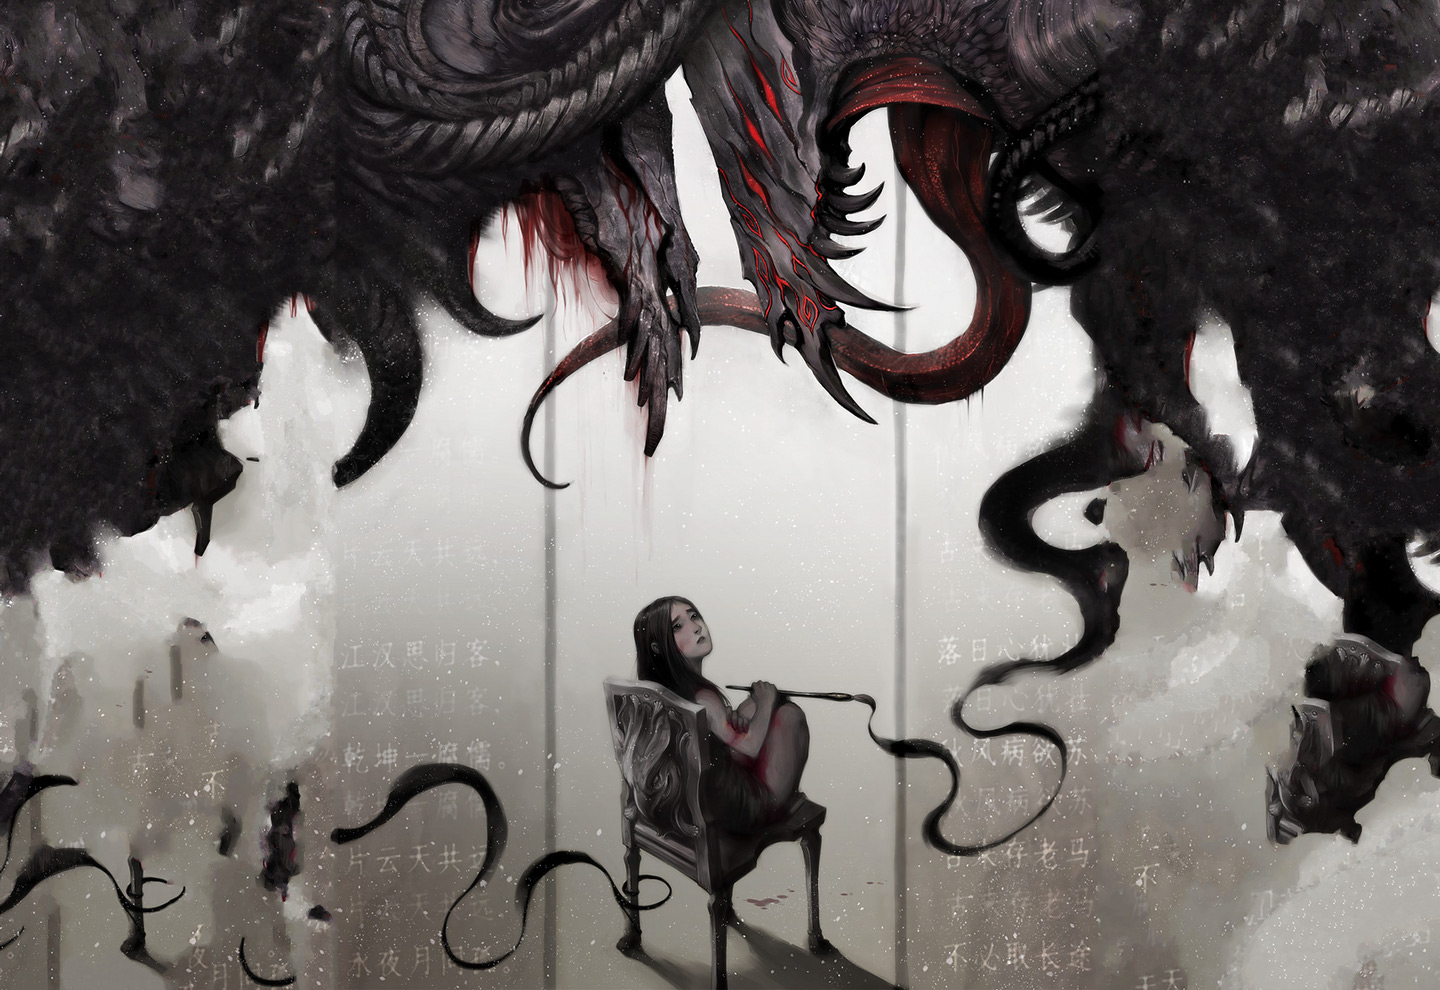

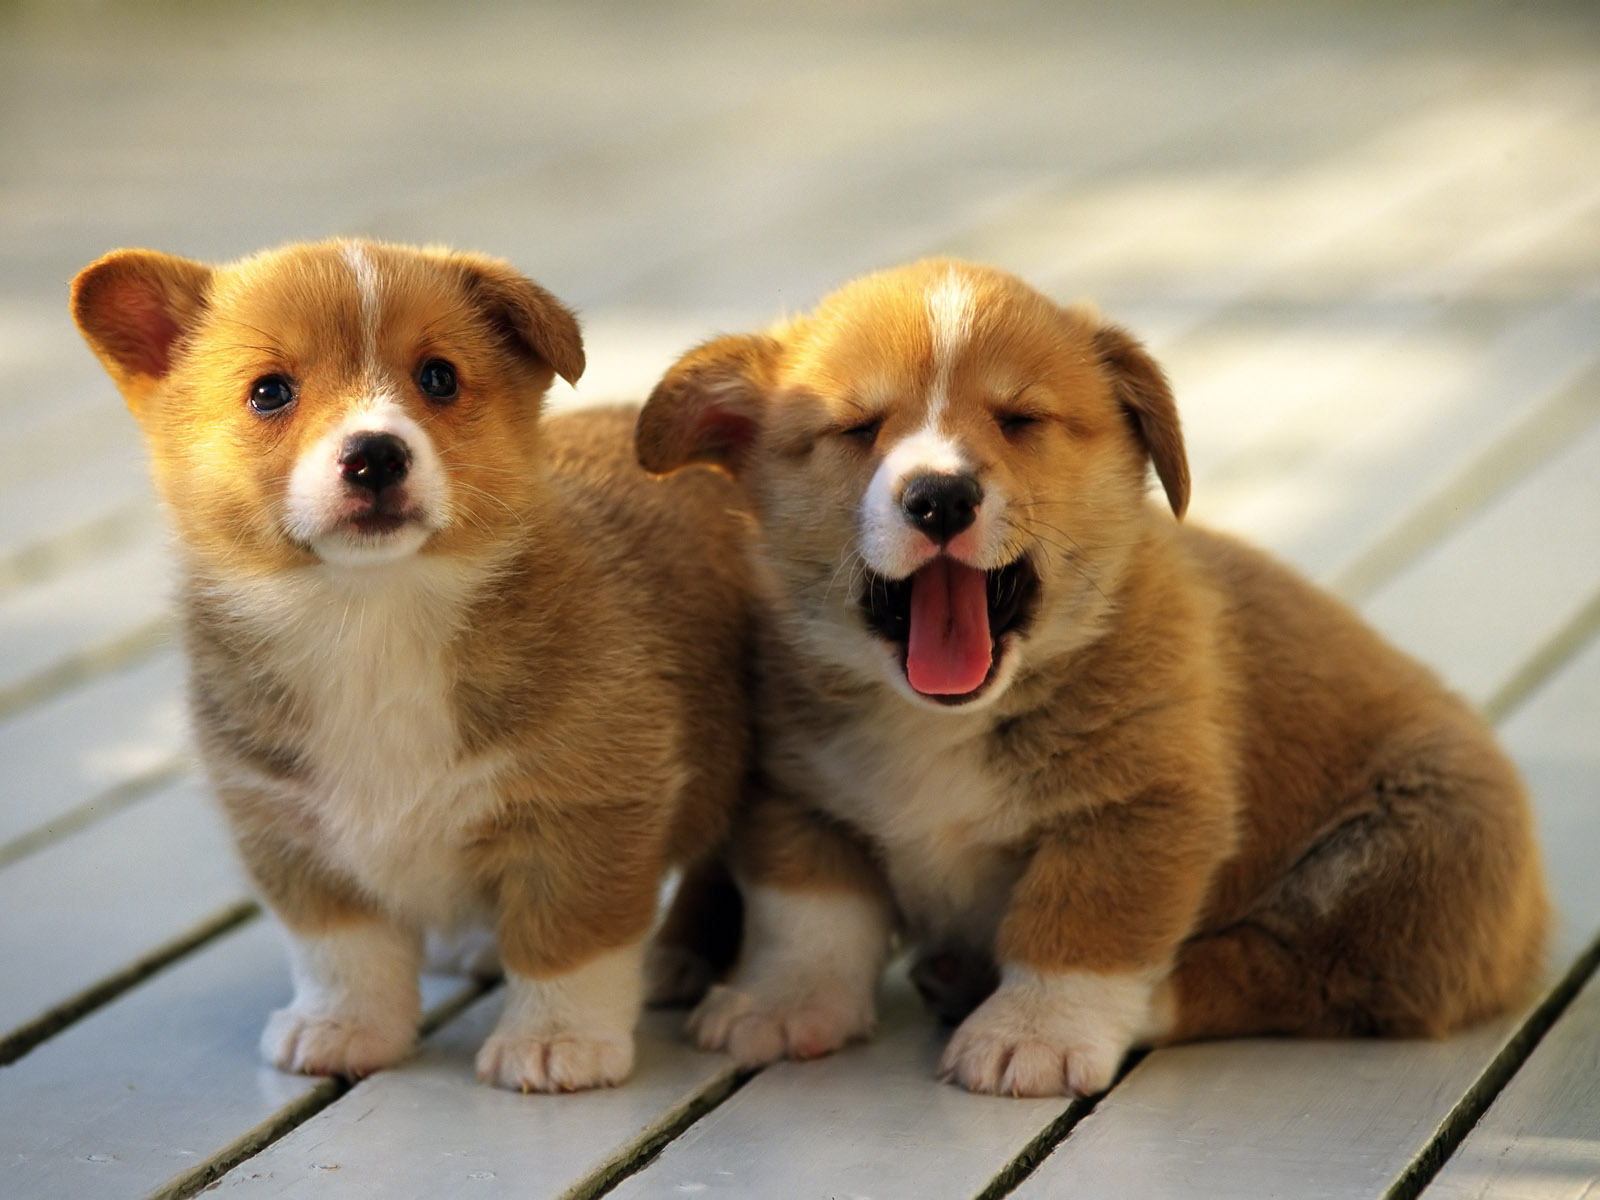

In [23]:
# Visualising the images 

from IPython.display import Image, display

display(Image(style_path, width=400, height=300))
print("\n")
display(Image(image_path, width=400, height=300))

In [24]:
# Image preprocessing (style and the image)

import numpy as np 

def rc(image_path_):
  width, height = keras.preprocessing.image.load_img(image_path_).size
  img_nrows = 400
  img_ncols = int(width * img_nrows / height)
  return img_nrows, img_ncols


def preprocess_input (image_path_):

  img_nrows, img_ncols = rc(image_path_)

  image = keras.preprocessing.image.load_img(image_path_, target_size=(img_nrows, img_ncols))

  image = keras.preprocessing.image.img_to_array(image)

  image = np.expanddims(image, axis=0)

  image = vgg19.preprocess_input(image)

  return tensorflow.convert_to_tensor(image)

In [25]:
def deprocess(image_, path):
    img_nrows, img_ncols = rc(path)

    x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

In [27]:
# gram matrix 

def gram_matrix(x):
  x = tenorflow.transpose(x, (2,0,1))
  features = tensorflow.reshape(x, (tensorflow.shape(x)[0], -1))

  gram = tensorflow.matmul(features, tensorflow.transpose(features))

  return gram

In [ ]:
def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels**2) * (size**2))

def content_loss(base, combination):
    return tf.reduce_sum(tf.square(combination - base))


# The 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


def total_variation_loss(x):
    a = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, 1:, : img_ncols - 1, :]
    )
    b = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, : img_nrows - 1, 1:, :]
    )
    return tf.reduce_sum(tf.pow(a + b, 1.25))